## CSCE636 Deep Learning - Dr. Anxiao Jiang
- Changcheng Yuan
- UIN: 53500517

## Q1

1) Check out the Jupyter notebook for Chapter 3 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-ml-frameworks.ipynb. Then, use the "GraidentTape API" to find the derivative of the function f(x) = sin(x) for x = 0, 0.1, 0.2 and 0.3. Submit your Jupyter notebook that shows both the code and the result you got. 

First, we look at the examples from given code.

In [1]:
import tensorflow as tf
import numpy as np

input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print("Input Variable:", input_var.numpy())
print("Result (Square):", result.numpy())
print("Gradient (d(result)/d(input_var)):", gradient.numpy())

/opt/miniconda3/envs/mainenv/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Input Variable: 3.0
Result (Square): 9.0
Gradient (d(result)/d(input_var)): 6.0


In [2]:
def find_f_gradient(f, x):
    x_var = tf.Variable(initial_value=x)
    with tf.GradientTape() as tape:
        y = f(x_var)
    grad = tape.gradient(y, x_var)
    return grad.numpy(), y.numpy()

In [3]:
xs = [0.0, 0.1, 0.2, 0.3]
for x in xs:
    grad, y = find_f_gradient(tf.sin, x)
    print(f"x: {x}, sin(x): {y}, gradient: {grad}")

 

x: 0.0, sin(x): 0.0, gradient: 1.0
x: 0.1, sin(x): 0.0998334214091301, gradient: 0.9950041770935059
x: 0.2, sin(x): 0.19866932928562164, gradient: 0.9800665974617004
x: 0.3, sin(x): 0.29552021622657776, gradient: 0.9553365111351013


## Q2

2) Check out the Jupyter notebook for Chapter 4 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_classification-and-regression.ipynb. Then, for the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets. 

First, we look at the baseline code.

In [4]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

In [9]:
# Preprocess the data: multi-hot encoding
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

x_train = multi_hot_encode(train_data, num_classes=10000)
x_test = multi_hot_encode(test_data, num_classes=10000)

y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (25000, 10000)
Training labels shape: (25000,)
Test data shape: (25000, 10000)
Test labels shape: (25000,)


In [16]:
# Build the model
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [17]:
# training the model
x_val = x_train[:10000]
y_val = y_train[:10000]

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
)

history_dict = history.history
history_dict.keys()

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7739 - loss: 0.5210 - val_accuracy: 0.8724 - val_loss: 0.3551
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9043 - loss: 0.2707 - val_accuracy: 0.8906 - val_loss: 0.2820
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9354 - loss: 0.1890 - val_accuracy: 0.8948 - val_loss: 0.2762
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9539 - loss: 0.1436 - val_accuracy: 0.8902 - val_loss: 0.2892
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9653 - loss: 0.1124 - val_accuracy: 0.8882 - val_loss: 0.3149
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0882 - val_accuracy: 0.8832 - val_loss: 0.3464
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0694 - val_accuracy: 0.8804 - val_loss: 0.3753
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0519 - val_accuracy: 0.8746 - val_loss:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

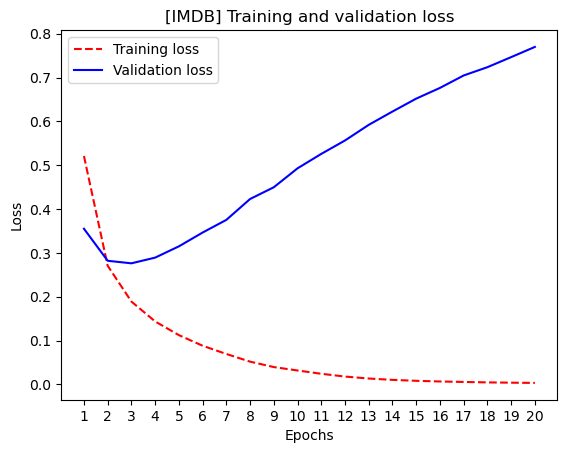

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

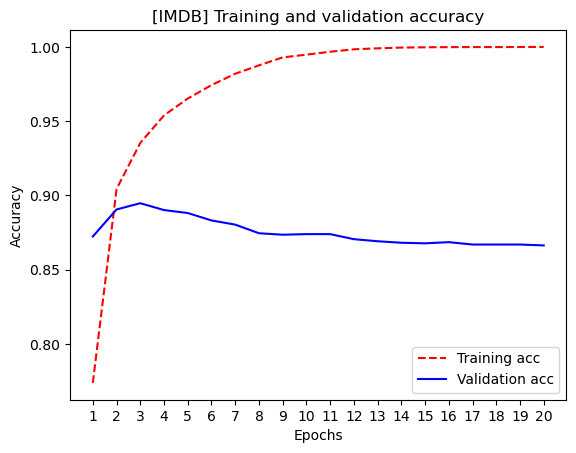

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
# check test accuracy
results = model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy:", results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8558 - loss: 0.8108
Test Loss, Test Accuracy: [0.8108184933662415, 0.8558400273323059]


### Our design

Now let's construct our network. The core consists of 3 parts, data representation, model design/training, output evaluation. 

1. data representation: one hot vector and the simple compressing of multi-hot vector is definitely not great. The word frequency and informative level is not counted for learning. For best result without overfitting, we would select the validation set randomly. 
2. model design/training: simple dense sequential network with small size have limited capability and the baseline is already showing overfitting. 
3. output evaluation: the loss functio is binary cross entropy, which is great for balanced data, for extremely imbalanced data, consider using focol loss. 

We will dissect the general problem with these 3 steps. 

In [23]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# To first understand the problem. we need to check the label distribution.
unique, counts = np.unique(y_train, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("Label distribution in training set:", label_distribution)

Training data shape: (25000, 10000)
Training labels shape: (25000,)
Test data shape: (25000, 10000)
Test labels shape: (25000,)
Label distribution in training set: {np.float32(0.0): np.int64(12500), np.float32(1.0): np.int64(12500)}


We see the label distribution is perfectly balanced with 12500 positive and 12500 negative samples. We will keep using binary cross entropy as our loss function and accuracy as our evaluation metric. We will try to improve the model on data representation and model design/training.

For data representation, we first try to use Term Frequency with Inverse Document Frequency (TF-IDF), we count the term frequency but down-weight it with global frequency.

In [51]:
import numpy as np

def tfidf_encode(sequences, num_classes, dtype="float32"):
    N = len(sequences)
    df = np.zeros(num_classes, dtype=np.int32)
    for seq in sequences:
        idx = np.unique(np.clip(seq, 0, num_classes - 1))
        df[idx] += 1
    idf = np.log((N + 1) / (df + 1)) + 1.0

    X = np.zeros((N, num_classes), dtype=dtype)
    for i, seq in enumerate(sequences):
        seq = np.clip(seq, 0, num_classes - 1)
        counts = np.bincount(seq, minlength=num_classes)
        tf = counts / max(1, len(seq))
        X[i] = tf * idf
    return X

x_train_tfidf = tfidf_encode(train_data, num_classes=10000)
x_test_tfidf = tfidf_encode(test_data, num_classes=10000)
print("TF-IDF encoded training data shape:", x_train_tfidf.shape)
print("TF-IDF encoded test data shape:", x_test_tfidf.shape)

TF-IDF encoded training data shape: (25000, 10000)
TF-IDF encoded test data shape: (25000, 10000)


Meanwhile, let's try to use a larger and deeper sequential network. 

In [56]:
model = keras.Sequential(
    [
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history_tfidf = model.fit(
    x_train_tfidf,
    y_train,
    epochs=15,
    batch_size=512,
    validation_split=0.2,
)

history_dict_tfidf = history_tfidf.history

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8236 - loss: 0.4300 - val_accuracy: 0.8758 - val_loss: 0.2959
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9406 - loss: 0.1661 - val_accuracy: 0.8854 - val_loss: 0.3016
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9728 - loss: 0.0874 - val_accuracy: 0.8720 - val_loss: 0.4068
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9850 - loss: 0.0503 - val_accuracy: 0.8804 - val_loss: 0.4601
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9914 - loss: 0.0282 - val_accuracy: 0.8752 - val_loss: 0.5452
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.8714 - val_loss: 0.6395
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.8764 - val_loss: 0.7303
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.8708 - v

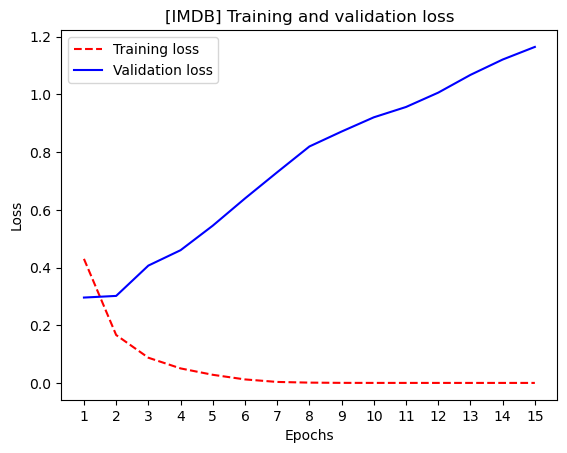

In [57]:
history_dict = history_dict_tfidf
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

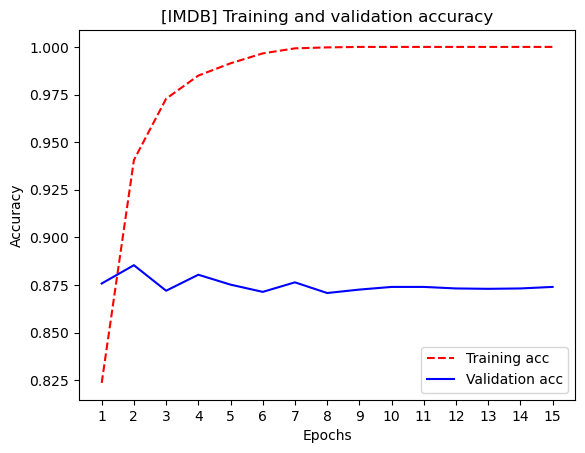

In [58]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [59]:
# check test accuracy
results = model.evaluate(x_test_tfidf, y_test)
print("Test Loss, Test Accuracy:", results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8457 - loss: 1.4193
Test Loss, Test Accuracy: [1.4193123579025269, 0.8456799983978271]


From the curve, we can observe that the overfitting is still significant at the beginning if training. Let's use random dropout and regularization. 

In [ ]:
wd = 1e-4  # L2 weight decay
dr1, dr2 = 0.5, 0.4  # dropout rates

model = keras.Sequential([
    layers.Input(shape=(x_train_tfidf.shape[1],)),
    layers.Dense(256, activation="relu",
                 kernel_initializer="he_normal",
                 kernel_regularizer=keras.regularizers.l2(wd)),
    layers.Dropout(dr1),
    layers.Dense(64, activation="relu",
                 kernel_initializer="he_normal",
                 kernel_regularizer=keras.regularizers.l2(wd)),
    layers.Dropout(dr2),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-5),
]

history_tfidf = model.fit(
    x_train_tfidf, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,  
    callbacks=callbacks,
)

history_dict_tfidf = history_tfidf.history

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7191 - loss: 0.6834 - val_accuracy: 0.8522 - val_loss: 0.5545 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8645 - loss: 0.4358 - val_accuracy: 0.8880 - val_loss: 0.3506 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9066 - loss: 0.3103 - val_accuracy: 0.8960 - val_loss: 0.3280 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9337 - loss: 0.2678 - val_accuracy: 0.8906 - val_loss: 0.3365 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9424 - loss: 0.2456 - val_accuracy: 0.8948 - val_loss: 0.3462 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9556 - loss: 0.2208 - val_accuracy: 0.8950 - val_loss: 0.3447 - learning_rate: 5.0000e-04


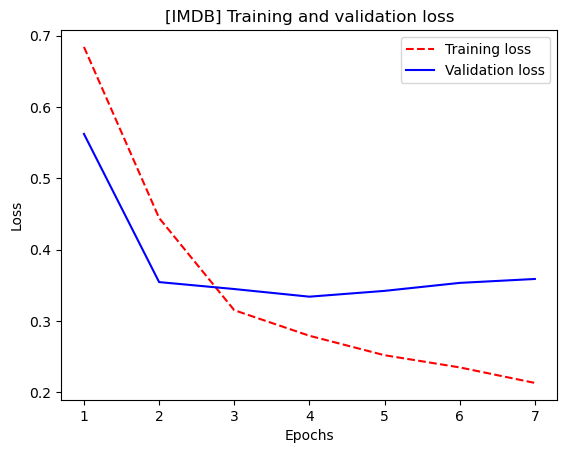

In [67]:
history_dict = history_dict_tfidf
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

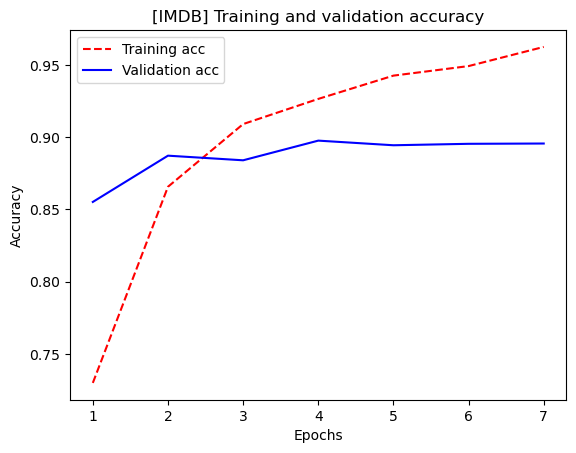

In [68]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

For our final implementation, we uses a fixed random train/validation split (no order bias). We reduces dense network capacity and adds light regularization and dropout to cope with the overfitting observed. Optimization is gentler and more stable via a lower learning rate (1e-4), EarlyStopping, and ReduceLROnPlateau, while increasing max epochs to 50 so callbacks can find a better minimum. Batch size is set to 256 and training shuffles each epoch for better generalization. Although the improvement on accuracy is limited, we can see the overfitting is handled. 

In [69]:
# check test accuracy
results = model.evaluate(x_test_tfidf, y_test)
print("Test Loss, Test Accuracy:", results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8853 - loss: 0.3560
Test Loss, Test Accuracy: [0.35602375864982605, 0.8853200078010559]


In [ ]:
rng = np.random.RandomState(42)
idx = rng.permutation(len(x_train_tfidf))
cut = int(0.8 * len(idx))
tr_idx, val_idx = idx[:cut], idx[cut:]
x_tr, y_tr = x_train_tfidf[tr_idx], y_train[tr_idx]
x_val, y_val = x_train_tfidf[val_idx], y_train[val_idx]

x_tr = x_tr.astype("float32", copy=False)
x_val = x_val.astype("float32", copy=False)

wd = 1e-6  # L2 weight decay
dr1, dr2 = 0.3, 0.2  # dropout rates

model = keras.Sequential([
    layers.Input(shape=(x_train_tfidf.shape[1],)),
    layers.Dense(64, activation="relu",
                 kernel_initializer="he_normal",
                 kernel_regularizer=keras.regularizers.l2(wd)),
    layers.Dropout(dr1),
    layers.Dense(32, activation="relu",
                 kernel_initializer="he_normal",
                 kernel_regularizer=keras.regularizers.l2(wd)),
    # layers.Dropout(dr2), 
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-5),
]

history_tfidf = model.fit(
    x_tr, y_tr,
    epochs=50,
    batch_size=256,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    shuffle=True,
)

history_dict_tfidf = history_tfidf.history

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6225 - loss: 0.6910 - val_accuracy: 0.6098 - val_loss: 0.6869 - learning_rate: 1.0000e-04
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7090 - loss: 0.6784 - val_accuracy: 0.7308 - val_loss: 0.6700 - learning_rate: 1.0000e-04
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 0.6567 - val_accuracy: 0.7930 - val_loss: 0.6453 - learning_rate: 1.0000e-04
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8121 - loss: 0.6261 - val_accuracy: 0.8142 - val_loss: 0.6130 - learning_rate: 1.0000e-04
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8424 - loss: 0.5882 - val_accuracy: 0.8322 - val_loss: 0.5749 - learning_rate: 1.0000e-04
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8605 - loss: 0.5443 - val_accuracy: 0.8486 - val_loss: 0.5330 - learning_rate: 1.0000e-04
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8717 - loss:

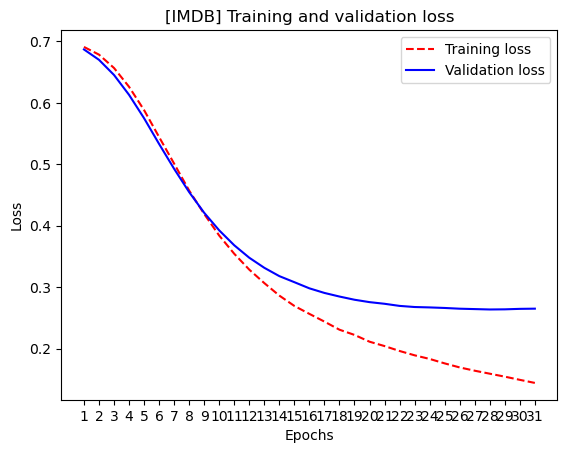

In [149]:
history_dict = history_dict_tfidf
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

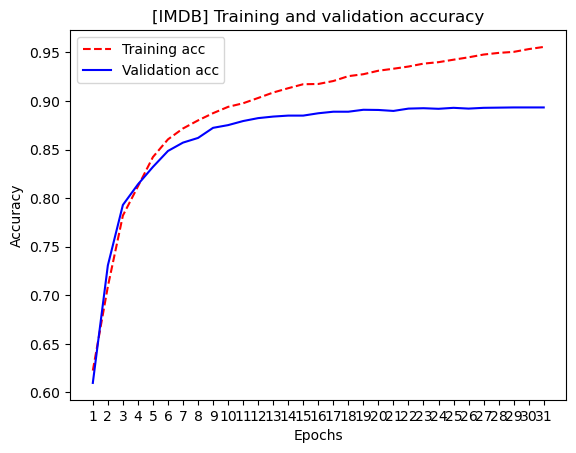

In [150]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [151]:
# check test accuracy
results = model.evaluate(x_test_tfidf, y_test)
print("Test Loss, Test Accuracy:", results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8836 - loss: 0.2829
Test Loss, Test Accuracy: [0.28293851017951965, 0.8835999965667725]
